In [8]:
# importing lab

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

## problem statement
- To predict the house price

## data gathering

In [10]:
df=pd.read_csv("Boston.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 4)EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [14]:
# outliers

<AxesSubplot: xlabel='CRIM'>

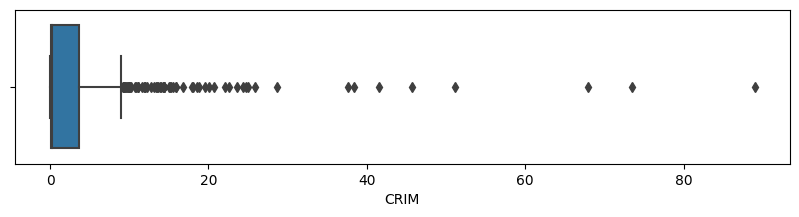

In [15]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df["CRIM"])

In [16]:
q1 = df["CRIM"].quantile(0.25)
q2 = df["CRIM"].quantile(0.50)
q3 = df["CRIM"].quantile(0.75)

median = df["CRIM"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)

Q1 : 0.08204499999999999
Q2 : 0.25651
Q3 : 3.6770825
Median: 0.25651


In [17]:
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Upper_tail: 14.462195000000001
Lower_Tail: -10.7030675


In [18]:
df.loc[df["CRIM"] > upper_tail,"CRIM"]=upper_tail

In [19]:
df.loc[df["CRIM"] < lower_tail,"CRIM"]=lower_tail

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
q1 = df["ZN"].quantile(0.25)
q2 = df["ZN"].quantile(0.50)
q3 = df["ZN"].quantile(0.75)

median = df["ZN"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 0.0
Q2 : 0.0
Q3 : 12.5
Median: 0.0
Upper_tail: 50.0
Lower_Tail: -37.5


In [22]:
df.loc[df["ZN"] > upper_tail,"ZN"]=upper_tail

In [23]:
df.loc[df["ZN"] < lower_tail,"ZN"]=lower_tail

In [24]:
q1 = df["INDUS"].quantile(0.25)
q2 = df["INDUS"].quantile(0.50)
q3 = df["INDUS"].quantile(0.75)

median = df["INDUS"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 5.19
Q2 : 9.69
Q3 : 18.1
Median: 9.69
Upper_tail: 56.830000000000005
Lower_Tail: -33.540000000000006


In [25]:
df.loc[df["INDUS"] > upper_tail,"INDUS"]

Series([], Name: INDUS, dtype: float64)

In [26]:
df.loc[df["INDUS"] > upper_tail,"INDUS"]=upper_tail

In [27]:
df.loc[df["INDUS"] < lower_tail,"INDUS"]=lower_tail

In [28]:
q1 = df["NOX"].quantile(0.25)
q2 = df["NOX"].quantile(0.50)
q3 = df["NOX"].quantile(0.75)

median = df["NOX"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 0.449
Q2 : 0.538
Q3 : 0.624
Median: 0.538
Upper_tail: 1.149
Lower_Tail: -0.0759999999999999


In [29]:
df.loc[df["NOX"] > upper_tail,"NOX"]=upper_tail

In [30]:
df.loc[df["NOX"] < lower_tail,"NOX"]=lower_tail

In [31]:
q1 = df["RM"].quantile(0.25)
q2 = df["RM"].quantile(0.50)
q3 = df["RM"].quantile(0.75)

median = df["RM"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 5.8854999999999995
Q2 : 6.2085
Q3 : 6.6235
Median: 6.2085
Upper_tail: 8.837500000000002
Lower_Tail: 3.671499999999998


In [32]:
df.loc[df["RM"] > upper_tail,"RM"]=upper_tail

In [33]:
df.loc[df["RM"] < lower_tail,"RM"]=lower_tail

In [34]:
q1 = df["AGE"].quantile(0.25)
q2 = df["AGE"].quantile(0.50)
q3 = df["AGE"].quantile(0.75)

median = df["AGE"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 45.025
Q2 : 77.5
Q3 : 94.07499999999999
Median: 77.5
Upper_tail: 241.22499999999997
Lower_Tail: -102.12499999999997


In [35]:
df.loc[df["AGE"] > upper_tail,"AGE"]=upper_tail

In [36]:
df.loc[df["AGE"] < lower_tail,"AGE"]=lower_tail

In [37]:
q1 = df["DIS"].quantile(0.25)
q2 = df["DIS"].quantile(0.50)
q3 = df["DIS"].quantile(0.75)

median = df["DIS"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 2.100175
Q2 : 3.2074499999999997
Q3 : 5.1884250000000005
Median: 3.2074499999999997
Upper_tail: 14.453175000000002
Lower_Tail: -7.164575000000001


In [38]:
df.loc[df["DIS"] > upper_tail,"DIS"]=upper_tail

In [39]:
df.loc[df["DIS"] < lower_tail,"DIS"]=lower_tail

In [40]:
q1 = df["RAD"].quantile(0.25)
q2 = df["RAD"].quantile(0.50)
q3 = df["RAD"].quantile(0.75)

median = df["RAD"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 4.0
Q2 : 5.0
Q3 : 24.0
Median: 5.0
Upper_tail: 84.0
Lower_Tail: -56.0


In [41]:
df.loc[df["RAD"] > upper_tail,"RAD"]=upper_tail

In [42]:
df.loc[df["RAD"] < lower_tail,"RAD"]=lower_tail

In [43]:
q1 = df["TAX"].quantile(0.25)
q2 = df["TAX"].quantile(0.50)
q3 = df["TAX"].quantile(0.75)

median = df["TAX"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 279.0
Q2 : 330.0
Q3 : 666.0
Median: 330.0
Upper_tail: 1827.0
Lower_Tail: -882.0


In [44]:
df.loc[df["TAX"] > upper_tail,"TAX"]=upper_tail

In [45]:
df.loc[df["TAX"] < lower_tail,"TAX"]=lower_tail

In [46]:
q1 = df["PTRATIO"].quantile(0.25)
q2 = df["PTRATIO"].quantile(0.50)
q3 = df["PTRATIO"].quantile(0.75)

median = df["PTRATIO"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 17.4
Q2 : 19.05
Q3 : 20.2
Median: 19.05
Upper_tail: 28.6
Lower_Tail: 8.999999999999996


In [47]:
df.loc[df["PTRATIO"] > upper_tail,"PTRATIO"]=upper_tail

In [48]:
df.loc[df["PTRATIO"] < lower_tail,"PTRATIO"]=lower_tail

In [49]:
q1 = df["B"].quantile(0.25)
q2 = df["B"].quantile(0.50)
q3 = df["B"].quantile(0.75)

median = df["B"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 375.3775
Q2 : 391.44
Q3 : 396.225
Median: 391.44
Upper_tail: 458.7675000000001
Lower_Tail: 312.8349999999999


In [50]:
df.loc[df["B"] > upper_tail,"B"]=upper_tail

In [51]:
df.loc[df["B"] < lower_tail,"B"]=lower_tail

In [52]:
q1 = df["LSTAT"].quantile(0.25)
q2 = df["LSTAT"].quantile(0.50)
q3 = df["LSTAT"].quantile(0.75)

median = df["LSTAT"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 6.949999999999999
Q2 : 11.36
Q3 : 16.955000000000002
Median: 11.36
Upper_tail: 46.97000000000001
Lower_Tail: -23.06500000000001


In [53]:
df.loc[df["LSTAT"] > upper_tail,"LSTAT"]=upper_tail

In [54]:
df.loc[df["LSTAT"] < lower_tail,"LSTAT"]=lower_tail

In [55]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.721417,8.967391,11.136779,0.069170,0.554695,6.284853,68.574901,3.795043,9.549407,408.237154,18.455534,377.805455,12.653063,22.532806
std,4.466174,16.522305,6.860353,0.253994,0.115878,0.701786,28.148861,2.105710,8.707259,168.537116,2.164946,27.953147,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.671500,2.900000,1.129600,1.000000,187.000000,12.600000,312.835000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,14.462195,50.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Train model

In [57]:
x  = df.drop("PRICE",axis = 1)
y = df["PRICE"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Model selection

In [58]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [59]:
#Training Data Evaluation

y_pred_train = knn_model.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 28.895815303430076
RMSE: 5.375482797240642
MAE: 3.6465963060686013
R-Squared value: 0.674162707448854


In [60]:
1-(1-r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.6625575436045665

In [61]:
#Testing Data Evaluation

y_pred = knn_model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 25.206198425196845
RMSE: 5.020577499172465
MAE: 3.5524409448818894
R-Squared value: 0.6400510272183058


In [62]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5986409684027126

In [63]:
0.674162707448854-0.6400510272183058

0.034111680230548225

# Hyperparameter Tuning

In [64]:
param_grid = {"n_neighbors":np.arange(2,30),"p":[1,2]}

gscv_knn_model = GridSearchCV(knn_model,param_grid,cv=5)
gscv_knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [65]:
gscv_knn_model.best_estimator_

KNeighborsRegressor(p=1)

### accuracy after tuning k and p value

In [66]:
knn_model_after = KNeighborsRegressor(p=1) #k=5 and p=1
knn_model_after.fit(x_train,y_train)

KNeighborsRegressor(p=1)

In [67]:
#Training Data Evaluation

y_pred_train = knn_model_after.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 23.16396833773087
RMSE: 4.812896044766692
MAE: 3.247598944591028
R-Squared value: 0.7387966164425632


In [68]:
#Testing Data Evaluation

y_pred = knn_model_after.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 22.000790551181105
RMSE: 4.690500032105437
MAE: 3.360472440944882
R-Squared value: 0.6858248187332121


In [69]:
0.7387966164425632-0.6858248187332121

0.05297179770935112

# preprocessing steps

## 1.Normalization

In [70]:
normal_scalar = MinMaxScaler()
array = normal_scalar.fit_transform(x)
x1 = pd.DataFrame(array,columns=x.columns)
x1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.36,0.067815,0.0,0.314815,0.568366,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.001452,0.00,0.242302,0.0,0.172840,0.538221,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.001451,0.00,0.242302,0.0,0.172840,0.687775,0.599382,0.348962,0.043478,0.104962,0.553191,0.951585,0.063466
3,0.001802,0.00,0.063050,0.0,0.150206,0.651170,0.441813,0.448545,0.086957,0.066794,0.648936,0.972997,0.033389
4,0.004339,0.00,0.063050,0.0,0.150206,0.680337,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.003895,0.00,0.420455,0.0,0.386831,0.571890,0.681771,0.122671,0.000000,0.164122,0.893617,0.941593,0.219095
502,0.002694,0.00,0.420455,0.0,0.386831,0.479299,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.003766,0.00,0.420455,0.0,0.386831,0.646863,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.007144,0.00,0.420455,0.0,0.386831,0.611236,0.889804,0.114514,0.000000,0.164122,0.893617,0.958960,0.131071


## Train test split after normalization

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=42)

In [72]:
knn_model_norm=KNeighborsRegressor() #k=5,p=2
knn_model_norm.fit(x_train,y_train)

KNeighborsRegressor()

In [73]:
#Training Data Evaluation

y_pred_train = knn_model_norm.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 17.02588179419525
RMSE: 4.12624306048435
MAE: 2.7474934036939307
R-Squared value: 0.8080113964994131


In [74]:
#Testing Data Evaluation

y_pred = knn_model_norm.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 24.418777952755914
RMSE: 4.9415359912436045
MAE: 2.898267716535434
R-Squared value: 0.6512955308686089


In [75]:
0.8080113964994131-0.6512955308686089

0.1567158656308042

# hyperparameter tuning after normalization

In [76]:
param_grid = {"n_neighbors":np.arange(2,30),"p":[1,2]}

gscv_model = GridSearchCV(knn_model_norm,param_grid,cv=5)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [77]:
gscv_model.best_estimator_

KNeighborsRegressor(n_neighbors=3, p=1)

# after hyperparameter tuning

In [78]:
knn_model_after_norm=KNeighborsRegressor(n_neighbors=3,p=1)
knn_model_after_norm.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3, p=1)

In [79]:
#Training Data Evaluation

y_pred_train = knn_model_after_norm.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 8.791835238932864
RMSE: 2.9651029052855593
MAE: 2.102814423922603
R-Squared value: 0.9008608076730894


In [80]:
#Testing Data Evaluation

y_pred = knn_model_after_norm.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 21.988258967629037
RMSE: 4.689163994533464
MAE: 2.733333333333333
R-Squared value: 0.6860037719633186


In [81]:
0.9008608076730894-0.6860037719633186

0.21485703570977077

## 2.Standardization

In [82]:
std_scalar = StandardScaler()
array = std_scalar.fit_transform(x)

x2 = pd.DataFrame(array,columns=x.columns)
x2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.608526,0.547233,-1.287909,-0.272599,-0.144217,0.413851,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.683767,-1.075562
1,-0.603822,-0.543282,-0.593381,-0.272599,-0.740262,0.194193,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.683767,-0.492439
2,-0.603826,-0.543282,-0.593381,-0.272599,-0.740262,1.283922,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.538022,-1.208727
3,-0.602688,-0.543282,-1.306878,-0.272599,-0.835284,1.017195,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.602479,-1.361517
4,-0.594467,-0.543282,-1.306878,-0.272599,-0.835284,1.229721,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.683767,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.595906,-0.543282,0.115738,-0.272599,0.158124,0.439525,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.507942,-0.418147
502,-0.599796,-0.543282,0.115738,-0.272599,0.158124,-0.235137,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.683767,-0.500850
503,-0.596325,-0.543282,0.115738,-0.272599,0.158124,0.985816,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.683767,-0.983048
504,-0.585381,-0.543282,0.115738,-0.272599,0.158124,0.726220,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.560224,-0.865302


## Train test split after standardization

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.25,random_state=42)

In [84]:
knn_model_std=KNeighborsRegressor() #k=5,p=2
knn_model_std.fit(x_train,y_train)

KNeighborsRegressor()

In [85]:
#Training Data Evaluation

y_pred_train = knn_model_std.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 13.540014775725595
RMSE: 3.6796759063436
MAE: 2.4415831134564643
R-Squared value: 0.8473190076384094


In [86]:
#Testing Data Evaluation

y_pred = knn_model_std.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 21.430270866141733
RMSE: 4.629284055460599
MAE: 2.6552755905511813
R-Squared value: 0.6939719407671471


In [87]:
0.8473190076384094-0.6939719407671471

0.15334706687126232

# hyperparameter tuning after std

In [88]:
param_grid = {"n_neighbors":np.arange(2,30),"p":[1,2]}

gscv_model = GridSearchCV(knn_model_std,param_grid,cv=5)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [89]:
gscv_model.best_estimator_

KNeighborsRegressor(n_neighbors=3, p=1)

## after HPT std accuracy

In [90]:
knn_model_after_std=KNeighborsRegressor(n_neighbors=3,p=1)
knn_model_after_std.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3, p=1)

In [91]:
#Training Data Evaluation

y_pred_train = knn_model_after_std.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 7.7026678393433015
RMSE: 2.775368054752973
MAE: 1.9861037818821454
R-Squared value: 0.9131425637990398


In [92]:
#Testing Data Evaluation

y_pred = knn_model_after_std.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 21.95569553805774
RMSE: 4.68569050813834
MAE: 2.7133858267716526
R-Squared value: 0.6864687834984464


In [93]:
0.9131425637990398-0.6864687834984464

0.22667378030059337

## New Data prediction

In [95]:
x.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [96]:
std_scalar.transform(x.head(1))

array([[-0.60852619,  0.54723282, -1.2879095 , -0.27259857, -0.14421743,
         0.41385055, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.68376708, -1.0755623 ]])

In [98]:
knn_model_std.predict(std_scalar.transform(x.head(1)))

array([25.8])

### Pickling The model file for deployment

In [99]:
import pickle

In [100]:
pickle.dump(knn_model_std,open('Boston.pkl','wb'))

In [101]:
pickled_model=pickle.load(open('Boston.pkl','rb'))

In [104]:
pickled_model.predict(std_scalar.transform(x.head(1)))

array([25.8])

# Standard data pickle

In [105]:
pickle.dump(std_scalar,open('scaling.pkl','wb'))

# Json File

In [106]:
import json
project_data={"columns" : list(x.columns)}

In [107]:
with open("project_data.json", "w") as f:
    json.dump(project_data,f)

In [108]:
CRIM=6.320e-03
ZN=1.800e+01
INDUS=2.310e+00
CHAS=0.000e+00
NOX=5.380e-01
RM=6.575e+00
AGE=6.520e+01
DIS=4.090e+00
RAD=1.000e+00
TAX=2.960e+02
PTRATIO=1.530e+01
B=3.969e+02
LSTAT=4.980e+00

In [109]:
model = pickle.load(open('Boston.pkl','rb'))
scalar = pickle.load(open('scaling.pkl','rb'))
json_data = json.load(open('project_data.json','rb'))
test_array=np.zeros(len(json_data["columns"]))
test_array[0]=CRIM
test_array[1]=ZN
test_array[2]=INDUS
test_array[3]=CHAS
test_array[4]=NOX
test_array[5]=RM
test_array[6]=AGE
test_array[7]=DIS
test_array[8]=RAD
test_array[9]=TAX
test_array[10]=PTRATIO
test_array[11]=B
test_array[12]=LSTAT
test_array1=scalar.transform([test_array])
test_array1

array([[-0.60852619,  0.54723282, -1.2879095 , -0.27259857, -0.14421743,
         0.41385055, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.68376708, -1.0755623 ]])

In [110]:
prediction=model.predict(test_array1)
prediction

array([25.8])